In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Description about the Dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#Datatypes of the features
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#Checking for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 22 missing values in the LoanAmount variable so we fill the missing values by the mean of all values in that variable.

In [12]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

There are 50 missing values in the credit History. we fill those missing values by the median of Credit History.

In [13]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

There are 14 missing values of Loan amount term

In [14]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [15]:
# handle categorical missing data
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

UNIVARIATE ANALYSIS

In [17]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [18]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [19]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [22]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Bivariate Analysis

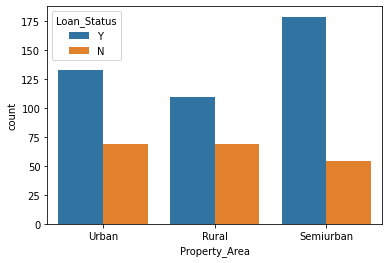

In [23]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

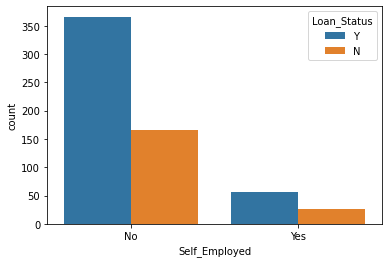

In [24]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

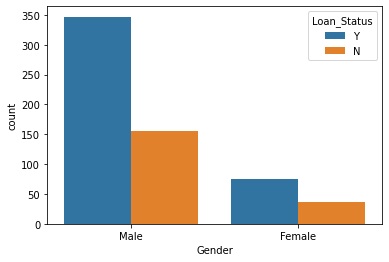

In [25]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

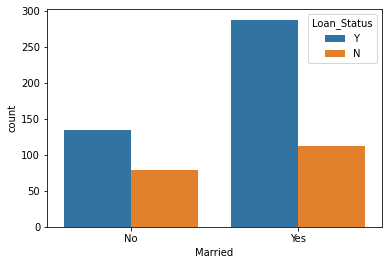

In [26]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

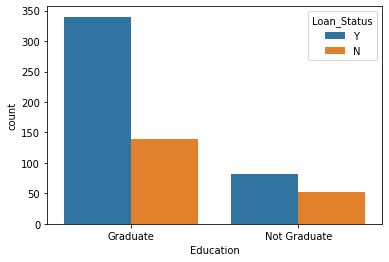

In [27]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
d1 = pd.get_dummies(data['Gender'], drop_first= True)
d2 = pd.get_dummies(data['Married'], drop_first= True)
d3 = pd.get_dummies(data['Dependents'], drop_first= True)
d4 = pd.get_dummies(data['Education'], drop_first= True)
d5 = pd.get_dummies(data['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(data['Property_Area'], drop_first= True)

In [30]:
data1 = pd.concat([data, d1, d2, d3, d4, d5, d6], axis = 1)
data=data1

In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,1,0,0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,0,0,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,0,0,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,0,0,0,1


In [32]:
data=data.drop(['Gender'],axis=1)

In [33]:
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,0,0,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,1,0,0,0,0,0,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,0,0,0,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,0,0,0,1,0,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,0,0,0,1


In [34]:
data=data.drop(['Married','Dependents','Education'],axis=1)

In [35]:
data=data.drop(['Self_Employed','Property_Area'],axis=1)

In [36]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,0,0,0,1


In [37]:
data=data.drop(['Loan_ID'],axis=1)

In [38]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,0,0,0,1


In [39]:
# specify input and output attributes
x = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']


In [40]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [41]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [46]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [47]:
#Predicting trest dataset
pred=log.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7727272727272727

In [49]:
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
pred_rf=rf1.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_rf)

0.7662337662337663

In [52]:

cm = confusion_matrix(y_test, pred_rf)
print(cm)

[[23 31]
 [ 5 95]]


In [53]:
from sklearn.model_selection import  GridSearchCV

In [54]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [3,5,10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_clf = RandomForestClassifier()

rf_clf_tuned = GridSearchCV(estimator=rf_clf,
                            param_grid=param_grid,
                            cv=5,
                            n_jobs=-1,
                            verbose=2)

rf_clf_tuned.fit(x_train, y_train)
rf_clf_tuned.best_estimator_


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


RandomForestClassifier(max_depth=110, max_features=5, min_samples_leaf=5,
                       min_samples_split=10)

In [55]:
rf_clf_tuned.best_score_

0.8239130434782609

In [56]:
rf= RandomForestClassifier(max_depth=110,max_features=10,min_samples_split=8,min_samples_leaf=5,n_estimators=100,random_state=42)

In [59]:
# model save
import pickle
rf.fit(x_train, y_train)
file=open("model.pkl", 'wb')
pickle.dump(rf, file)

In [58]:
rf.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))